# Forecasting and Predicting the Furniture Sales of a Superstore

We are using Superstore sales data for furniture sales between 2014 to 2017 and apply a simple model to forecast for 2018

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
4. **[Visualizing Furniture Sales Time Series Data](#exploratory_data_analysis)**
    - 4.1 - [Checking Stationarity](#Checking_Stationarity)
    - 4.2 - [Decomposing](#Decomposing)
5. **[Forecasting](#Forecasting)**
    - 5.1 - [Time Series Forecasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)
    - 5.2 - [Parameter Selection](#Parameter_Selection)
    - 5.3 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.4 - [Validating Forecasts](#Validating_Forecasts)
    - 5.5 - [Visualizing the Forecast](#Visualizing_the_Forecast)

<a id='import_packages'></a>
# Import Packages

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

<a id='load_data'></a>
# Load Data

In [3]:
import sys
import types
import pandas as pd
import os
# from botocore.client import Config
# import ibm_boto3

# def __iter__(self): return 0

# # @hidden_cell
# # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# # You might want to remove those credentials before you share your notebook.
# client_db221c9083da49bda597e7df5fb8517c = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id='ztvuwmXsgiz2MMSqWErcIYDe0fm2k9Qx08YFU4asfx-P',
#     ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
#     config=Config(signature_version='oauth'),
#     endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

# body = client_db221c9083da49bda597e7df5fb8517c.get_object(Bucket='timeseries-donotdelete-pr-jsyogp3niusggu',Key='Super Store.csv')['Body']
# # add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )



furniture = pd.read_csv(r"C:\Users\Nikita\Downloads\Super_Store.csv", encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


<a id='data_preparation'></a>
# Data Preparation

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [6]:
# Checking structure of the data
furniture.shape

(2121, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [7]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


<a id='check_data_type'></a>
## 3.3 Checking Data Type and Missing Values 

In [9]:
# summary of the data 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

Checking the furniture sales time stamp

In [10]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

We remove the columns that we do not need as well as check missing values

In [11]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [13]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 845 to 964
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.7+ KB


In [15]:
furniture["Order Date"].value_counts()

9/5/2016      10
10/30/2017     9
12/1/2016      9
11/19/2017     9
12/25/2016     9
              ..
6/17/2017      1
2/3/2017       1
6/17/2014      1
2/4/2016       1
10/23/2016     1
Name: Order Date, Length: 889, dtype: int64

In [12]:
furniture.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


Aggregate sales data by date

In [16]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,1/1/2017,975.4900
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,104.7700
4,1/11/2014,9.9400
...,...,...
884,9/8/2016,3374.9816
885,9/8/2017,1000.2390
886,9/9/2014,864.0240
887,9/9/2016,15.0080


Indexing with the Time Series Data

In [17]:
furniture["Order Date"].value_counts()

1/1/2017      1
6/16/2014     1
6/11/2017     1
6/12/2015     1
6/12/2016     1
             ..
12/28/2017    1
12/29/2014    1
12/29/2016    1
12/29/2017    1
9/9/2017      1
Name: Order Date, Length: 889, dtype: int64

In [18]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.sort_values(by="Order Date", inplace=True)

In [19]:
furniture["Order Date"].min()  # year(2011)-month(11)-day(23)

Timestamp('2014-01-06 00:00:00')

In [20]:
furniture["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [21]:
furniture

,Order Date,Sales
49,2014-01-06,2573.8200
50,2014-01-07,76.7280
1,2014-01-10,51.9400
4,2014-01-11,9.9400
7,2014-01-13,879.9390
...,...,...
290,2017-12-24,1393.4940
293,2017-12-25,832.4540
300,2017-12-28,551.2568
303,2017-12-29,2330.7180


In [22]:
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky

In [25]:

furniture.to_csv("df.csv")

<AxesSubplot:xlabel='Order Date'>

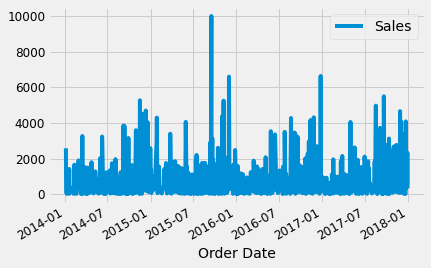

In [24]:
furniture

In [26]:
y = furniture['Sales'].resample('MS').mean() 

In [27]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

Taking a look at the furniture sales data for the year 2017

In [28]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

<a id='exploratory_data_analysis'></a>
# Visualizing Furniture Sales Time Series Data

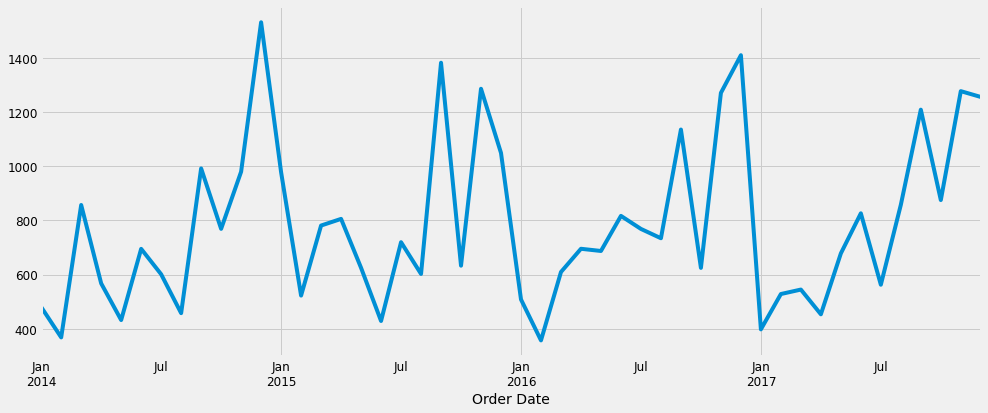

In [29]:
y.plot(figsize=(15, 6))
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year

In [31]:
train = y[:'2017-06-01']
test = y['2017-07-01':]

In [35]:
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [42]:
fcast = ets_fit.forecast(steps=12)
fcast

2017-07-01     741.423195
2017-08-01     673.046697
2017-09-01    1284.856616
2017-10-01     756.386560
2017-11-01    1368.828222
2017-12-01    1556.822344
2018-01-01     786.231007
2018-02-01     591.221389
2018-03-01     920.412228
2018-04-01     861.025934
2018-05-01     808.159661
2018-06-01     947.976192
Freq: MS, dtype: float64

In [39]:
test

Order Date
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [44]:
print("MSE: ", np.mean((test-fcast)**2))
print("MAE: ",np.mean(np.abs((test-fcast))))

MSE 30766.450006091472
MAE 158.2653109717968


In [52]:

def ETS_auto(train, test,alpha=[None], beta=[None], gamma=[None]):
    best_alpha=0
    best_beta=0
    best_gamma=0
    best_mae=None
    for i in alpha:
        for j in beta:
            for k in gamma:  
                ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
                ets_fit = ets_model.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k)
                fcast = ets_fit.forecast(steps=6)
                mae=np.mean(np.abs((test-fcast)))
                if best_mae is None or best_mae >mae:
                    best_mae=mae
                    best_alpha=i
                    best_beta=j
                    best_gamma=k
    best_params={"alpha":i, "beta":j, "gamma":k,"mae":best_mae}
    return best_params
            
            
        

In [63]:
# ETS_auto(train, test,alpha=np.linspace(0,.9, 50), beta=np.linspace(0,.9, 50), gamma=np.linspace(0,.99, 50))

In [65]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], phi=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    '''The auto_hwm (short for auto holt winters model) function to search for the best possible parameter
        combination for the Exponential Smoothing model i.e. smoothing level, smoothing slope, 
        smoothing seasonal and damping slope based on mean absolute error.

        ****Paramters****

        timeseries: array-like

                  Time-Series

        val_split_date: str

                  The datetime to split the time-series for validation

        alpha: list of floats (optional)

                  The list of alpha values for the simple exponential smoothing parameter

        beta: list of floats (optional)

                  The list of beta values for the Holt’s trend method parameter

        gamma: list of floats (optional)

                  The list of gamma values for the holt winters seasonal method parameter

        phi: list of floats (optional)

                  The list of phi values for the damped method parameter

        trend: {“add”, “mul”, “additive”, “multiplicative”, None} (optional)

                  Type of trend component.

        seasonal: {“add”, “mul”, “additive”, “multiplicative”, None} (optional)
                  
                  Type of seasonal component.

        periods: int (optional)
                  
                  The number of periods in a complete seasonal cycle

        ****Returns****

        best_params: dict

                  The values of alpha, beta, gamma and phi for which the 
                  validation data (val_split_date) gives the least mean absolute error
    '''

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma) * len(phi), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:
                for p in phi:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g, 'phi': p})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g, damping_slope=p)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.float64(mean_absolute_error(actual, f_cast)).mean()

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'phi': p, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])


In [66]:
auto_hwm(y, val_split_date = '2017-06-01', 
         alpha = np.linspace(0,0.5,5), 
         beta = np.linspace(0,0.5,5), 
         gamma = np.linspace(0,0.5,5), 
         trend='mul', 
         seasonal='mul', 
         periods=12, verbose=True)

Evaluating Exponential Smoothing model for 125 fits

Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0

{'alpha': 0.25,
 'beta': 0.0,
 'gamma': 0.0,
 'phi': None,
 'mae': 101.03155490050624}

In [74]:
# our guessed parameters
alpha = 0.25
beta = 0
gamma = 0

# initialise model
ets_model = ExponentialSmoothing(y, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [75]:
fcast = ets_fit.forecast(steps=12)

In [76]:
fcast

2018-01-01     651.352655
2018-02-01     533.299497
2018-03-01     831.924512
2018-04-01     745.182708
2018-05-01     702.043376
2018-06-01     801.253112
2018-07-01     773.269630
2018-08-01     854.949991
2018-09-01    1385.785350
2018-10-01     882.300003
2018-11-01    1435.362530
2018-12-01    1557.224073
Freq: MS, dtype: float64

<a id='Checking_Stationarity'></a>
# Checking Stationarity

Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). 
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

In [77]:
from statsmodels.tsa.stattools import adfuller


In [78]:
adfuller(y)

(-5.191070187339266,
 9.168756655665896e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)

In [72]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


We can see that our statistic value of -4.756843 is less than the value of -3.578 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

<a id='Decomposing'></a>
# Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

In [95]:
y.to_csv("y.csv")

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='multiplicative',  two_sided=False, extrapolate_trend=4)
decomposition

Order Date
2014-01-01    1.002710
2014-02-01    1.019019
2014-03-01    1.449618
2014-04-01    1.059923
2014-05-01    0.836962
2014-06-01    1.152516
2014-07-01    1.035863
2014-08-01    0.784992
2014-09-01    0.950487
2014-10-01    1.177302
2014-11-01    0.904377
2014-12-01    1.269304
2015-01-01    1.664691
2015-02-01    1.160107
2015-03-01    1.075209
2015-04-01    1.237542
2015-05-01    0.991407
2015-06-01    0.594809
2015-07-01    1.064848
2015-08-01    0.890869
2015-09-01    1.130075
2015-10-01    0.830289
2015-11-01    1.025524
2015-12-01    0.769986
2016-01-01    0.810682
2016-02-01    0.796413
2016-03-01    0.862330
2016-04-01    1.124647
2016-05-01    1.177519
2016-06-01    1.189932
2016-07-01    1.156875
2016-08-01    1.109079
2016-09-01    0.980359
2016-10-01    0.888704
2016-11-01    1.109356
2016-12-01    1.102843
2017-01-01    0.635298
2017-02-01    1.137841
2017-03-01    0.726224
2017-04-01    0.691269
2017-05-01    1.107494
2017-06-01    1.176125
2017-07-01    0.855795


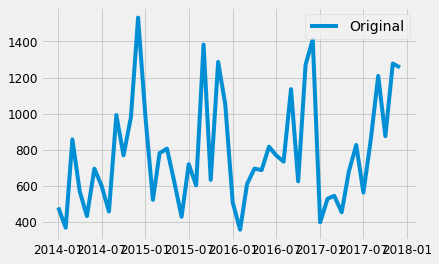

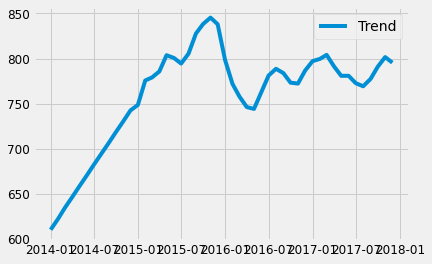

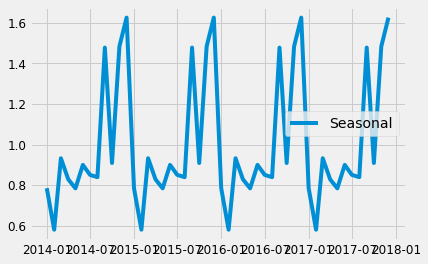

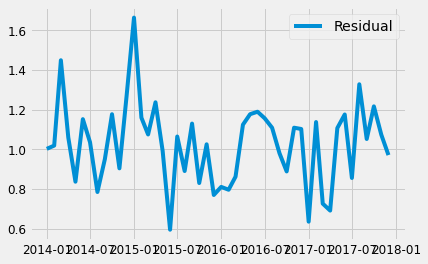

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='multiplicative',  two_sided=False, extrapolate_trend=4)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

By visualizing the decomposed components of the original time series we can say that the sales of furniture is unstable, along with its obvious seasonality.

<a id='Forecasting'></a>
# Forecasting

<a id='Time_Series_Forcasting_using_ARIMA'></a>
# Time Series Forecasting using ARIMA
We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data

In [ ]:
SARIMA(data, param=(p,d,q), seasonal_params=(P,D,Q,periods))

In [104]:
# p = d = q = range(0, 3)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# seasonal_pdq

In [74]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<a id='Parameter_Selection'></a>
# Parameter Selection 
We use “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [106]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1541.1544125832575
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:354.7862732407005
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793726
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:146.88834672464736
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:336.9536604856288
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:149.84561033292687
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1540.9802990406256
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:309.56039684622556
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302578
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:148.83996705488377
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:162.12029487165503
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:151.35761675098883
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12

<a id='Fitting_the_ARIMA'></a>
# Fitting the ARIMA model

In [107]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6674      1.485     -0.449      0.653      -3.578       2.243
ma.L1         -2.6963      0.002  -1096.356      0.000      -2.701      -2.691
ma.S.L12   -2.126e+14   5.05e-05  -4.21e+18      0.000   -2.13e+14   -2.13e+14
sigma2      1.129e+05   4.24e+04      2.663      0.008    2.98e+04    1.96e+05


Running model diagnostiscs to check any unusual behaviour

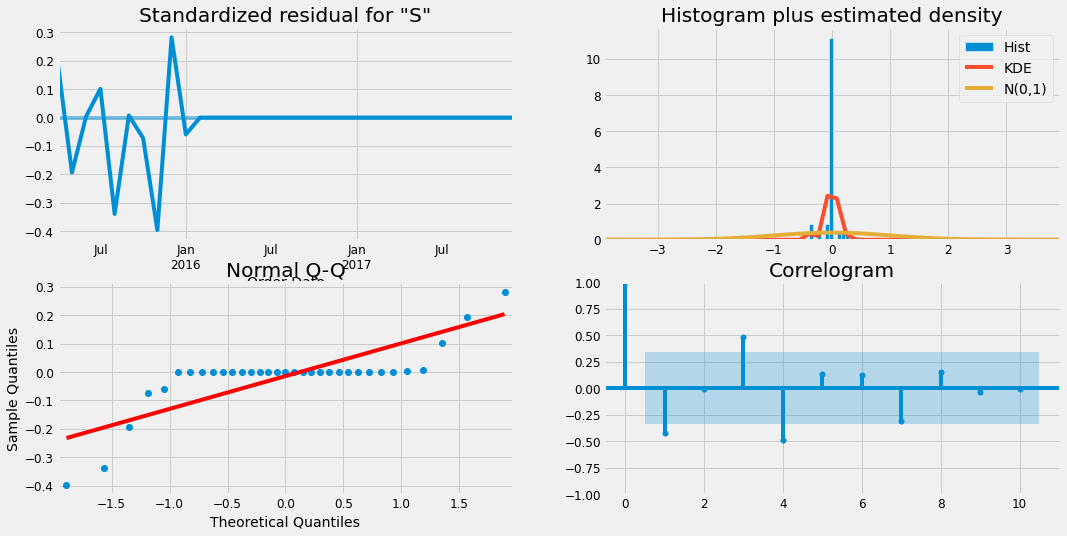

In [108]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Standardized Residual : The residuals scatters around a mean near zero, as they should, with no obvious trends or patterns indicating misspecification.

Histogram plus estimated density: The data distribution is nearly normal.

Normal Q-Q : The plots show sample quantiles versus theoretical quantiles. Those are the quantiles from the standard Normal distribution with mean 0 and standard deviation 1. The points seem to fall about a straight line. This graphs to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential

Correlogram : There is no evidence of autocorrelation outside of the Bartlett two-standard-error bands for white noise, given by the blue lines.

The model diagnostics indicates that the model residuals are near normally distributed

The model diagnostics indicates that the model residuals are near normally distributed

<a id = 'Validating_Forecasts'></a>
# Validating Forecasts
We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

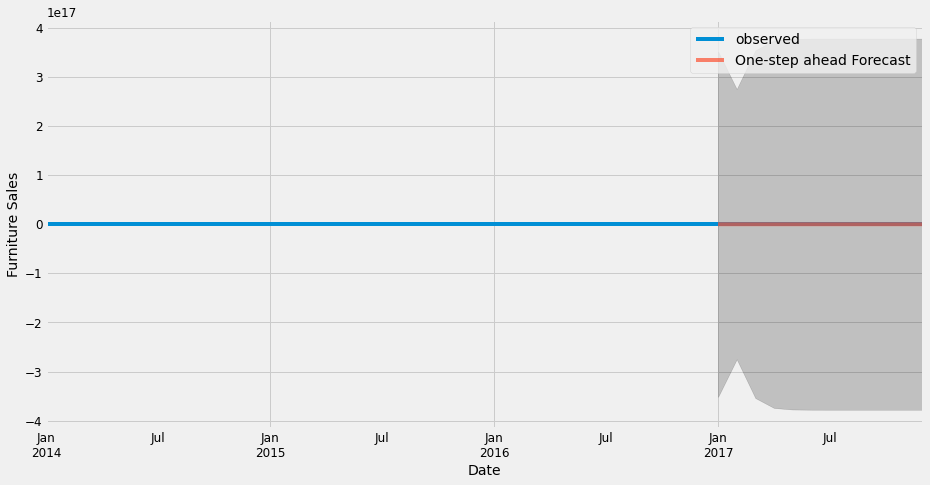

In [109]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

# Calculating RMSE

In [110]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 309110811690.03


RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales.

<a id ='Visualizing_the_Forecast'></a>
# Visualizing the Forecast 

             lower Sales   upper Sales
2018-01-01 -3.775051e+17  3.775051e+17
2018-02-01 -3.777811e+17  3.777811e+17
2018-03-01 -4.514336e+17  4.514336e+17
2018-04-01 -4.572292e+17  4.572292e+17
2018-05-01 -4.947771e+17  4.947771e+17
2018-06-01 -5.071454e+17  5.071454e+17
2018-07-01 -5.327590e+17  5.327590e+17
2018-08-01 -5.480553e+17  5.480553e+17
2018-09-01 -5.686593e+17  5.686593e+17
2018-10-01 -5.847577e+17  5.847577e+17
2018-11-01 -6.028437e+17  6.028437e+17
2018-12-01 -6.188161e+17  6.188161e+17
2019-01-01 -6.354116e+17  6.354116e+17


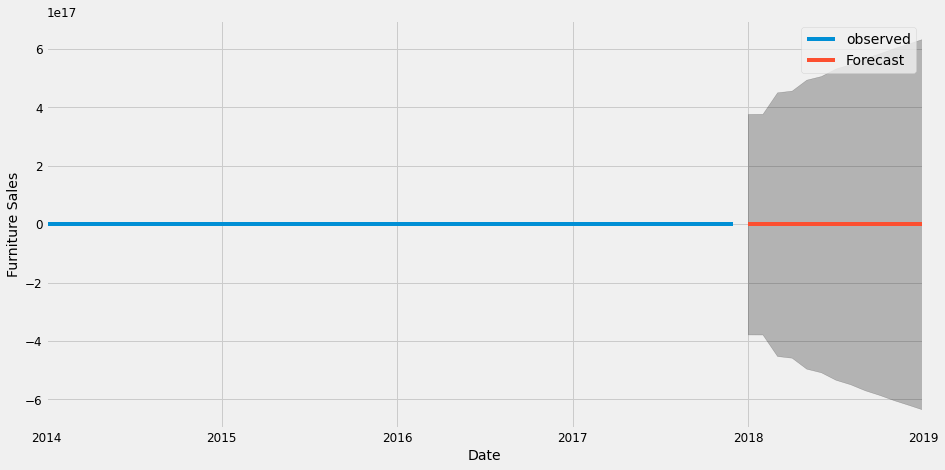

In [111]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

# Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time in a year.